In [1]:
# import os
# import numpy as np
# # split full data into 2 mutually exclusive subfolders
# input_dir = "./../INPUT_all/data/combined_data"
# output_dir_A = "./../INPUT_all/data/combined_split_A"
# output_dir_B = "./../INPUT_all/data/combined_split_B"
# 
# # Read files into a numpy array
# file_list = os.listdir(input_dir)[1:]
# print(file_list)
# # for file in file_list
# for cat in range(10):
#     file = file_list[cat]
#     data = np.loadtxt(os.path.join(input_dir, file), dtype=str)
# 
#     split_index = len(data) // 2
#     split_A = data[:split_index]
#     split_B = data[split_index:]
#     if len(split_A) > len(split_B):
#         split_A = split_A[:len(split_B)]
#     else:
#         split_B = split_B[:len(split_A)]
# 
# 
#     np.savetxt(os.path.join(output_dir_A, f"half-images-unlabeled-{cat}.dat"), split_A, fmt="%s")
#     np.savetxt(os.path.join(output_dir_B, f"half-images-unlabeled-{cat}.dat"), split_B, fmt="%s")


In [2]:
import numpy as np
import os
import json
import sys
import matplotlib.pyplot as plt

sys.path.append("../")

In [3]:
import importlib
import src.plot as myplot
importlib.reload(myplot)

<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/0_classifier/paper_plots/../src/plot.py'>

In [4]:

import importlib
import src.paper_utils as utils
importlib.reload(utils)

<module 'src.paper_utils' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/0_classifier/paper_plots/../src/paper_utils.py'>

In [6]:

# # testing
# digit = 0
# nr_runs = 99
# sample_sizes = [2000,3000]
# stats_a_seeA = utils.letter_means_stds("B", sample_sizes, nr_runs, digit,recreate_letter="B", add_smooth=False)


In [26]:
import math


def probability_on_data(single_mcm,counts_gstar, data,sample_size, smooth=True):
    """Calculate the probability at g* of a partitioning ("single_mcm") on some (possibly new) data.

    :param single_mcm: Each binary string is an icc state.
    :type single_mcm: np.array 1D with dtype string
    :param data: Dataset to calcualte evidence on. result from np.loadtext(dtype=str)
    :type data: np.array 1D with dtype string
    """
    mcm_gen = np.array([[int(s) for s in state] for state in single_mcm])
    data_gen = np.array([[int(s) for s in state] for state in counts_gstar])
    
    N = len(data)
    nr_iccs = len(single_mcm)

    res = np.zeros(nr_iccs)
    for icc_idx, icc in enumerate(single_mcm):
        rank = icc.count("1")
        C_icc = data_gen[:,mcm_gen[icc_idx,:] == 1]
        counts = np.unique(C_icc, axis=0, return_counts=True)[1]

        for k in counts: 
            if smooth:
                res[icc_idx] *= (k+1/(2**rank))/(sample_size+1) # FIXME these are the wrong counts, we need for every state we observe we need to use our own counts at g* to calculate the probability
            else: 
                res[icc_idx] *= k/sample_size

    return res



In [27]:
digit = 0

sample_sizes = [100, 1000, 2000, 3000]
letter = "B"
path_format = "../OUTPUT/sample_sizes_split_{}"

counts_samplesizes, mcms_samplesizes = utils.load_counts_mcm(sample_sizes, letter)

n_runs = min([len(i) for i in mcms_samplesizes])




other_letter = "B" if letter == "A" else "A"
print(letter, other_letter)

# see other letter
evids_both = [] # 0 = own; 1 = other

for see_letter in [letter, other_letter]:
    print(see_letter)
    evids = np.zeros((len(sample_sizes), n_runs)) # nr sample sizes, nr runs
    for sample_size_idx, sample_size in enumerate(sample_sizes):

        mcms = mcms_samplesizes[sample_size_idx][:n_runs]
        counts_gstar = counts_samplesizes[sample_size_idx][:n_runs] # test
         
        for run_idx, mcm in enumerate(mcms):
            seed_run = run_idx+1
            test_data = utils.recreate_dataset(see_letter,digit, sample_size, seed=seed_run) 

            evids[sample_size_idx][run_idx] = probability_on_data(mcm[digit], counts_gstar[digit],test_data, sample_size,smooth=True)# / sample_size

            # print(len(my_counts[run_idx]),len(mcms))
            # per_icc = np.sum(utils.evidence_iccs(my_counts[run_idx], mcms[run_idx],digit))#/ my_sample_size
            # if not evids[sample_size_idx][run_idx] == per_icc and see_letter = letter:
            #     raise KeyboardInterrupt
            # print(evids[sample_size_idx][run_idx] == per_icc, evids[sample_size_idx][run_idx], per_icc)  # if res constructed on own letter, should be exact same result)

    evids_both.append(evids)


B A
B


TypeError: int() argument must be a string, a bytes-like object or a real number, not 'list'

In [ ]:
raise KeyboardInterrupt

In [10]:



stats_a_seeA = utils.letter_means_stds("A", sample_sizes, nr_runs, digit,recreate_letter="A", add_smooth=False)
stats_a_seeB = utils.letter_means_stds("A", sample_sizes, nr_runs, digit,recreate_letter="B", add_smooth=False)

nested
nested
nested
nested
nested
nested
nested
nested


In [7]:
digit = 0
nr_runs = 99
sample_sizes = [100, 1000,2000,3000]

stats_b_seeA = utils.letter_means_stds("B", sample_sizes, nr_runs, digit,recreate_letter="A",add_smooth=False)
stats_b_seeB = utils.letter_means_stds("B", sample_sizes, nr_runs, digit,recreate_letter="B",add_smooth=False)

nested
nested
nested
nested
nested
nested
nested
nested


In [11]:
mapping = {"A":[stats_a_seeA, stats_a_seeB], "B": [stats_b_seeB, stats_b_seeA]}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[8.50261929e-13 6.33013038e-12]
 [8.49651644e-13 6.68087733e-12]
 [8.88953883e-13 6.46068648e-12]
 [1.40223663e-12 1.04501541e-11]]
[[2.19048756e-13 1.88102171e-12]
 [1.52756868e-12 1.26977395e-11]
 [1.24634256e-12 8.65164435e-12]
 [3.02154754e-12 2.58838336e-11]]


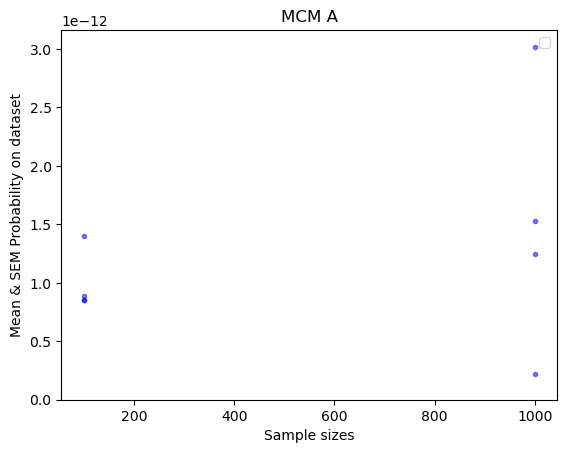

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[2.31736562e-12 1.84530615e-11]
 [1.43774372e-12 1.13147129e-11]
 [1.87243655e-12 1.36856916e-11]
 [2.39701274e-12 1.77040574e-11]]
[[2.56981622e-13 2.30803566e-12]
 [6.89811348e-13 5.15128518e-12]
 [1.07315155e-12 8.03644134e-12]
 [1.18929799e-12 8.58832667e-12]]


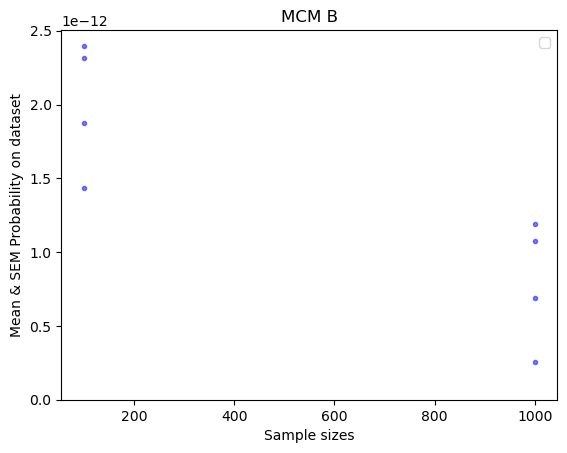

In [17]:


colors = ["b","r"]
label = ["see training", "see test"]

plt.figure()

mapping = {"A":[stats_a_seeA, stats_a_seeB], "B": [stats_b_seeB, stats_b_seeA]}

for let,vals in mapping.items():

    sample_sizes = [100, 1000,2000,3000]
    for i, stats in enumerate(vals):
        arr = np.array(np.mean(stats,axis=1))
        print(arr)
        plt.scatter(np.full(len(arr[:,0]) , fill_value=sample_sizes[i]), arr[:,0], marker=".", color="blue", alpha= .5)

        # plt.errorbar(sample_sizes, arr[:,0], yerr=np.std(arr[:, 0])/np.sqrt(sample_sizes[i]), fmt='o', capsize=5, linewidth=1,color=colors[i],label=label[i], linestyle=":") #arr[:, 1]/np.sqrt(sample_sizes[i])
    plt.title(f"MCM {let}")
    plt.xlabel("Sample sizes")
    plt.ylabel("Mean & SEM Probability on dataset")

    plt.ylim((0,None))
    plt.legend()
    plt.show()



-----------------------

In [9]:
# probs = np.empty((n_icc,sample_size))
# for i in range(len(ranks)):
#     probs[i,:] = counts_to_prob(counts_observe_X[i],ranks[i], sum_of_count)
# probs_mcm = np.product(probs,axis=0)

# # return np.mean(probs_mcm), np.std(probs_mcm)

In [10]:
# print(probs_mcm.shape)

In [11]:
# calculate average probability for digit 0 for 10 samples sample idx 0 for seeing a 0 of dataset B


In [12]:
# now working with A only
# for every sample size
# for every sample, need to calculate average probability of seeing seed=42 sample in dataset B
# then we calculate the mean + std over the 50 samples in a sample size

# do the same with B

In [13]:
n_variables = 121
data_path = "../INPUT_all/data/"
data_filename_format = "train-images-unlabeled-{}.dat"
sample_size = 10
C = counts_sample[0]
all_MCM = mcm_sample[0]

# # for all images in all categories, get the PDF of that all ICC of one MCM fitted to one image
all_C_icc = myplot.calculate_P_icc(C, all_MCM, 0, n_variables, data_path, data_filename_format)


np.save(samples_path + f"/{sample_size}/all_C_icc_c{digit}_s{sample_idx}.npy", all_C_icc)

del all_C_icc

NameError: name 'counts_sample' is not defined

In [ ]:
all_C_icc_c0_s0 = np.load(samples_path + f"/{sample_size}/all_C_icc_c0_s0.npy")

In [ ]:
mcms_fname = "MCMs_0.json"
counts_fname = "Counts_0.json"
n_samples = 100

with open(os.path.join(samples_path,str(n_samples),"MCMs", mcms_fname), "r") as f:
        all_MCM = [np.array(i) for i in json.load(f)] 


with open(os.path.join(samples_path,str(n_samples),"Counts", counts_fname), "r") as f:
        C = json.load(f

In [ ]:
n_variables = 121 #TODO This cell is not trash.
data_path = "../INPUT_all/data/"
data_filename_format = "train-images-unlabeled-{}.dat"

# # for all images in all categories, get the PDF of that all ICC of one MCM fitted to one image
all_C_icc_3 = myplot.calculate_P_icc(C, all_MCM, 3, n_variables, data_path, data_filename_format)
np.save("../OUTPUT/sample_sizes/5423/all_C_icc_3.npy", all_C_icc_3)


all_C_icc_3 = np.load("../OUTPUT/sample_sizes/5423/all_C_icc_3.npy")